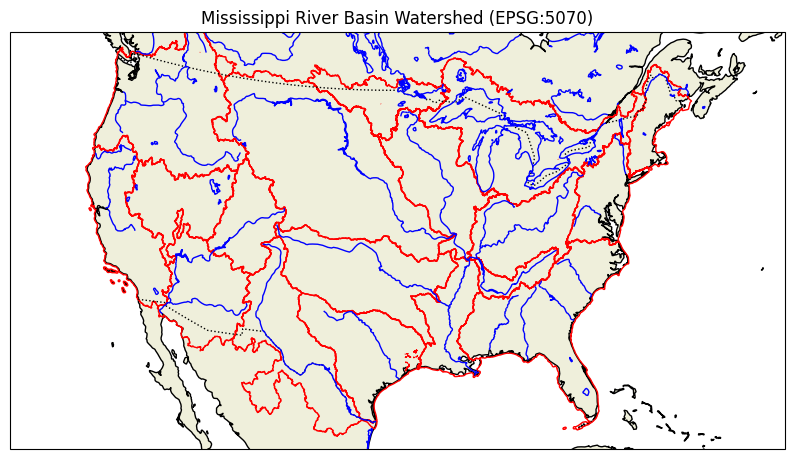

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the watershed boundary
shapefile_path = "/workspaces/mississippi_river_analysis/HUC2.shp"
watershed = gpd.read_file(shapefile_path)

# Convert to EPSG:5070 (NAD83 / Conus Albers)
watershed = watershed.to_crs(epsg=5070)

# Set up the Cartopy projection for EPSG:5070
projection = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23, standard_parallels=(29.5, 45.5))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Set the map extent to the Lower 48 U.S. states
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot the watershed boundary
ax.set_title("Mississippi River Basin Watershed (EPSG:5070)")
watershed.plot(ax=ax, edgecolor="red", facecolor="none", linewidth=1, transform=ccrs.epsg(5070))

# Show the plot
plt.show()


/usr/local/python/3.12.1/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/tmp/ipykernel_8829/4083369904.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  patches = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / len(basin_dict)), label=name)


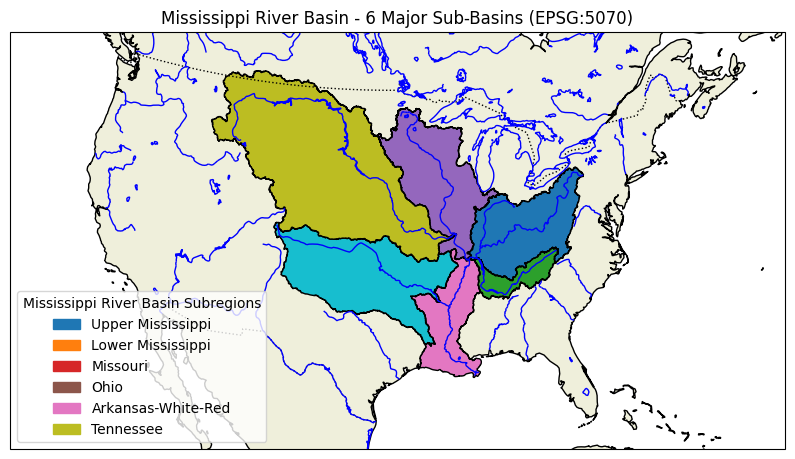

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Load the watershed boundary dataset
shapefile_path = "/workspaces/mississippi_river_analysis/HUC2.zip"
watershed = gpd.read_file(shapefile_path)

# Convert to EPSG:5070 (NAD83 / Conus Albers)
watershed = watershed.to_crs(epsg=5070)

# Define HUC2 codes and their corresponding basin names
basin_dict = {
    "07": "Upper Mississippi",
    "08": "Lower Mississippi",
    "10": "Missouri",
    "05": "Ohio",
    "11": "Arkansas-White-Red",
    "06": "Tennessee"
}

# Filter the dataset for the selected sub-basins
mississippi_watershed = watershed[watershed["HUC2"].isin(basin_dict.keys())]

# Create a new column for readable basin names
mississippi_watershed["Basin Name"] = mississippi_watershed["HUC2"].map(basin_dict)

# Set up the Cartopy projection for EPSG:5070
projection = ccrs.AlbersEqualArea(central_longitude=-96, central_latitude=23, standard_parallels=(29.5, 45.5))

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Set the map extent to the Lower 48 U.S. states
ax.set_extent([-125, -66, 24, 50], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Plot the 6 sub-basins with different colors
cmap = "tab10"
mississippi_watershed.plot(ax=ax, column="HUC2", cmap=cmap, edgecolor="black", legend=False, transform=ccrs.epsg(5070))

# Create custom legend
patches = [mpatches.Patch(color=plt.cm.get_cmap(cmap)(i / len(basin_dict)), label=name) 
           for i, name in enumerate(basin_dict.values())]
ax.legend(handles=patches, loc="lower left", title="Mississippi River Basin Subregions")

# Add title
ax.set_title("Mississippi River Basin - 6 Major Sub-Basins (EPSG:5070)")

# Show plot
plt.show()
